In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy.stats import poisson

In [2]:
np.random.seed(6)

population = np.concatenate((
    poisson.rvs(loc=18, mu=35, size=150000),
    poisson.rvs(loc=18, mu=10, size=100000)
))

sample_1 = np.concatenate((
    poisson.rvs(loc=18, mu=30, size=30),
    poisson.rvs(loc=18, mu=10, size=20)
))

print(population.mean())
print(sample_1.mean())

43.000112
39.26


In [3]:
from scipy.stats import ttest_1samp

ttest_1samp(
    a=sample_1,                  # Sample data
    popmean = population.mean()  # Population mean
)

TtestResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678, df=49)

In [4]:
from scipy.stats import t

c1 = t.ppf(q=0.025, df=49)
c2 = t.ppf(q=0.975, df=49)

print(c1, c2)

-2.0095752344892093 2.009575234489209


In [5]:
t.cdf(x=-2.5742, df=49) * 2

0.013121066545690117

In [6]:
sigma_estimate = sample_1.std() / math.sqrt(50)

t.interval(
    0.95,
    df=49,
    loc=sample_1.mean(),
    scale=sigma_estimate
)

(36.369669080722176, 42.15033091927782)

In [7]:
sigma_estimate = sample_1.std() / math.sqrt(50)

t.interval(
    0.99,
    df=49,
    loc=sample_1.mean(),
    scale=sigma_estimate
)

(35.40547994092107, 43.11452005907893)

In [8]:
np.random.seed(12)

sample_2 = np.concatenate((
    poisson.rvs(loc=18, mu=33, size=30),
    poisson.rvs(loc=18, mu=13, size=20)
))

print(sample_2.mean())

42.8


In [9]:
from scipy.stats import ttest_ind        # <------- A/B Testing

ttest_ind(
    a=sample_1,
    b=sample_2,
    equal_var=False  # Assume sample have equal variance ?
)


TtestResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748, df=97.9724575497005)

In [10]:
from scipy.stats import norm

np.random.seed(11)

before = norm.rvs(scale=30, loc=250, size=100)
after = before + norm.rvs(scale=5, loc=-1.25, size=100)

weight = {
    "weight_before": before,
    "weight_after": after,
    "weight_change": after - before
}

weight['weight_change'].mean()

-1.2303750057960445

In [11]:
from scipy.stats import ttest_rel

ttest_rel(
    a=before,
    b=after
)

TtestResult(statistic=2.5720175998568284, pvalue=0.011596444318439859, df=99)

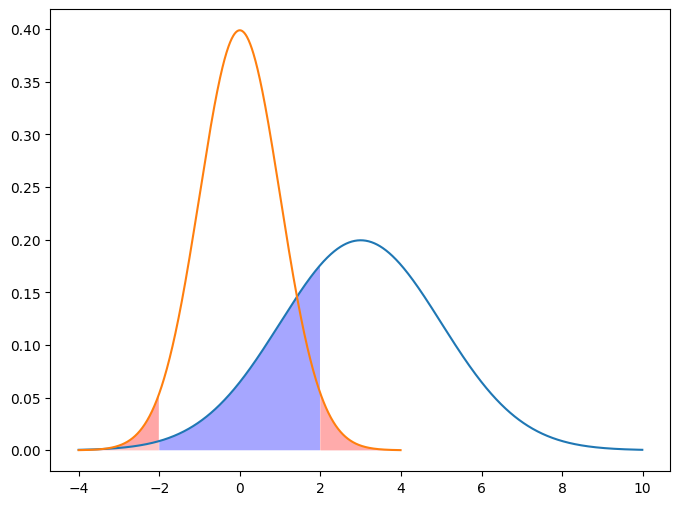

In [12]:
from scipy.stats import norm

plt.figure(figsize=(8,6))

plt.plot(np.arange(-4,10,0.01), norm.pdf(np.arange(-4,10,0.01),loc=3,scale=2))
plt.plot(np.arange(-4,4,0.01), norm.pdf(np.arange(-4,4,0.01)))

plt.fill_between(
    x=np.arange(-4,-2,0.01),
    y1=norm.pdf(np.arange(-4,-2,0.01)),
    facecolor='red',
    alpha=0.35
)

plt.fill_between(
    x=np.arange(-2,2,0.01),
    y1=norm.pdf(np.arange(-2,2,0.01)),
    facecolor='white',
    alpha=0.35
)

plt.fill_between(
    x=np.arange(2,4,0.01),
    y1=norm.pdf(np.arange(2,4,0.01)),
    facecolor='red',
    alpha=0.5
)

plt.fill_between(
    x=np.arange(-4,-2,0.01),
    y1=norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2),
    facecolor='white',
    alpha=0.35
)

plt.fill_between(
    x=np.arange(-2,2,0.01),
    y1=norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2),
    facecolor='blue',
    alpha=0.35
)

plt.fill_between(
    x=np.arange(2,10,0.01),
    y1=norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
    facecolor='white',
    alpha=0.35
)


plt.show()

In [13]:
lower_quantile = norm.ppf(0.025)       # ----> x1
upper_quantile = norm.ppf(0.975)       # ----> x2

print(lower_quantile, upper_quantile)

low = norm.cdf(lower_quantile, loc=3, scale=2)
high = norm.cdf(upper_quantile, loc=3, scale=2)

high - low

-1.9599639845400545 1.959963984540054


0.294956061112323